<a href="https://colab.research.google.com/github/tinawong15/portends-greatness/blob/master/elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import matplotlib.pyplot as plt

In [0]:
plotly.tools.set_credentials_file(username='raunakchow', api_key='MBOLCsoeY3lkW4dXsAhC')

In [0]:
!git clone https://raunakchowdhury:<p>!@github.com/tinawong15/portends-greatness

In [0]:
!ls portends-greatness

In [0]:
csv_path = "portends-greatness/countypres_2000-2016.csv"
# csv_path = os.path.join('countypres_2000-2016.csv') 
df = pd.read_csv(csv_path, sep="\t") 
# df

In [0]:
winners = df.sort_values(['year', 'state', 'county', 'candidatevotes'], ascending=(True, True, True, False)).groupby(['year', 'state', 'county']).head(1)

In [0]:
# winners

In [0]:
counties_vote = winners.sort_values(['state', 'county', 'year'], ascending=(True, True, True))
# counties_vote

In [0]:
counties_vote = counties_vote.drop(["FIPS", "version", "office", "state_po"], axis=1)
# counties_vote

In [0]:
counties_vote["location"] = counties_vote['county'].str.cat(counties_vote['state'], sep=" ")
second_counties_vote = counties_vote.copy()

In [0]:
counties_vote = counties_vote.drop(['state', 'county'], axis=1)
# counties_vote

In [0]:
# counties_vote['order'] = counties_vote.apply(lambda row: (row.year - 2000)//4, axis = 1)

In [0]:
# counties_vote

In [0]:
new_counties_vote = counties_vote.copy()
# new_counties_vote

In [0]:
new_counties_vote["next_vote"] = new_counties_vote.groupby('location')["party"].shift(-1)
# new_counties_vote

In [0]:
new_counties_vote["no_swing"] = new_counties_vote["next_vote"] == new_counties_vote["party"]
# new_counties_vote

In [0]:
swing = new_counties_vote.groupby('location')['no_swing'].apply(lambda x: (x == False).sum()).reset_index(name='count')
swing['swinginess'] = (swing['count'] - 1) / 4
swing = swing.drop(["count"], axis=1)
# swing[swing['location'] == 'Autauga Alabama']
swing = swing.sort_values(['swinginess'], ascending=(True))

In [0]:
csv_path = "portends-greatness/1976-2016-president.csv"
data = pd.read_csv(csv_path)
data = data.drop(["state_fips", "notes", "state_cen", "state_ic", "writein", "version", "office"], axis=1)
print(data.shape)
states = data[data['year'] >= 2000]
print(states.shape)

In [0]:
state_winners = states.sort_values(['year', 'state', 'candidatevotes'], ascending=(True, True, False)).groupby(['year', 'state']).head(1)
state_winners

In [0]:
states_vote = state_winners.sort_values(['state', 'year'], ascending=(True, True))
states_vote

In [0]:
new_states_vote = states_vote.copy()
new_states_vote["next_vote"] = new_states_vote.groupby('state')["party"].shift(-1)
new_states_vote["no_swing"] = new_states_vote["next_vote"] == new_states_vote["party"]

In [0]:
swing_states = new_states_vote.groupby('state')['no_swing'].apply(lambda x: (x == False).sum()).reset_index(name='count')
swing_states['swinginess'] = (swing_states['count'] - 1) / 4
swing_states = swing_states.drop(["count"], axis=1)
swing_states.sort_values(['swinginess'], ascending=(True))

In [0]:
relevant_states = swing_states[swing_states['swinginess']>0]
relevant_states

In [0]:
all_states = data.sort_values(['year', 'state', 'candidatevotes'], ascending=(True, True, False)).groupby(['year', 'state']).head(1)
all_states


In [0]:
all_states_vote = all_states.copy()
all_states_vote["next_vote"] = all_states_vote.groupby('state')["party"].shift(-1)

In [0]:
all_states_vote

In [0]:
all_states_vote["no_swing"] = all_states_vote["next_vote"] == all_states_vote["party"]

In [0]:
all_swing_states = all_states_vote.groupby(['state','state_po'])['no_swing'].apply(lambda x: (x == False).sum()).reset_index(name='count')
all_swing_states['swinginess'] = (all_swing_states['count'] - 1) / 10
all_swing_states = all_swing_states.drop(["count"], axis=1)
all_swing_states.sort_values(['swinginess'], ascending=(True))

In [0]:
scale = [
    [0.0, 'rgb(242,240,247)'],
    [0.1, 'rgb(218,218,235)'],
    [0.2, 'rgb(188,189,220)'],
    [0.3, 'rgb(158,154,200)'],
    [0.4, 'rgb(117,107,177)'],
    [0.5, 'rgb(84,39,143)']
]

chloro = [go.Choropleth(
    colorscale = scale,
    autocolorscale = False,
    locations = all_swing_states['state_po'],
    z = all_swing_states['swinginess'].astype(float),
    locationmode = 'USA-states',
    # text = df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Swingibility")
)]

In [0]:
layout = go.Layout(
    title = go.layout.Title(
        text = 'Swinginess by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = chloro, layout = layout)
# py.iplot(fig, filename = 'd3-cloropleth-map')

In [0]:
path = "portends-greatness/1980-2014-Gen-Election-Turnout.csv"
turnout = pd.read_csv(path)
turnout = turnout[turnout['Year'] % 4 == 0]
all_states_vote = all_states_vote[all_states_vote['year'] > 1976]
all_states_vote = all_states_vote[all_states_vote['year'] < 2016]
turnout = turnout.drop([52, 884, 780, 676, 572, 468, 364, 260, 156], axis=0)
turnout = turnout.sort_values(["Year", "Unnamed: 3"], ascending=(True, True))
vep = pd.DataFrame(turnout["Voting-Eligible Population (VEP)"])
vep = vep.reset_index(drop=True)
all_states_vote = all_states_vote.reset_index(drop=True)
all_states_vote = all_states_vote.join(vep)
all_states_vote.rename(columns={'Voting-Eligible Population (VEP)':'vep'}, 
                 inplace=True)
all_states_vote
turnout[turnout["Unnamed: 3"] == "United States"]
vep.shape

In [0]:
all_states_vote['turnout'] = all_states_vote.apply(lambda row: (row.totalvotes / int((row.vep).replace(',' , ''))), axis = 1)
all_states_vote

In [0]:
last_swing_states = all_swing_states.sort_values(['swinginess'], ascending=(True)).tail(5)['state'].tolist()
last_swing_states
non_swing_states = all_swing_states.sort_values(['swinginess'], ascending=(True)).head(5)['state'].tolist()
non_swing_states

years = [i for i in range(1980, 2016, 4)]

In [0]:
# plotted least swinginess states
plt.figure(0)
for state in non_swing_states:
#     print(all_states_vote[all_states_vote['state'] == state]['turnout'])
    plt.plot(years, all_states_vote[all_states_vote['state'] == state]['turnout'], linewidth=2, markersize=12)
    
plt.title("""Turnout of States with the Least "Swinginess" """)
plt.legend(non_swing_states)
plt.xlabel('Year')
plt.ylabel('% Turnout')
plt.show()

In [0]:
# plotted most swinginess states
plt.figure(1)
for state in last_swing_states:
#     print(all_states_vote[all_states_vote['state'] == state]['turnout'])
    plt.plot(years, all_states_vote[all_states_vote['state'] == state]['turnout'], linewidth=2, markersize=12)
    
plt.title("""Turnout of States with the Most "Swinginess" """)
plt.legend(last_swing_states)
plt.xlabel('Year')
plt.ylabel('% Turnout')
plt.show()

In [0]:
path = "portends-greatness/county_population.csv"
county_pop = pd.read_csv(path)
drop_years = [str(i) for i in range(2000, 2009)]
county_pop = county_pop.drop(['areaname'] + drop_years, axis=1)
county_pop.rename(columns={'state_name':'state',
                          'county_name':'county'}, 
                 inplace=True)
county_pop = county_pop.dropna()

In [0]:
def return_county(county):
    """returns the county without extra text like 'city' """
#     print(county, type(county) == float)
#     print(type(county))
    county = str(county).split(' ')
    return ' '.join(list(filter(lambda x: x not in {'County', 'city'}, county)))

county_pop['county_name'] = county_pop.apply(lambda x: return_county(x.county), axis = 1)
# county_pop = county_pop[type(county_pop['state']) == str]
print(county_pop['county_name'].shape, county_pop['state'].shape)
county_pop['location'] = county_pop['county_name'].str.cat(county_pop['state'], sep=' ')
# county_pop.drop('county_name', axis=1)
# location
# county_pop.isna()

In [0]:
second_counties_vote

In [0]:
second_counties_vote = second_counties_vote.drop(['candidate', 'party'], axis=1)  

In [0]:
# separate into individual totalvotes
counties = pd.DataFrame(second_counties_vote.groupby(['location','state', 'county'])['totalvotes'].max()).reset_index(['location','state', 'county'])
# counties

In [0]:
second_counties_vote = second_counties_vote.sort_values('location', ascending=True)
county_pop = county_pop.sort_values('location', ascending=True)
# merge both dfs
final_county = county_pop.merge(second_counties_vote, on=['location']).dropna()

In [0]:
final_county = final_county.drop(['state_y', 'county_y', 'total_pop'], axis=1)
final_county.rename(columns={'state_x':'state',
                          'county_x':'county'}, 
                 inplace=True)

In [0]:
# note: '2009' means against the 2009 pop
final_county['turnout'] = final_county.apply(lambda row: (row.totalvotes / row['2009']), axis = 1)

In [0]:
swingy_districts = swing[swing['swinginess'] > 0.5]['location']

In [0]:
years = [2000, 2004, 2008, 2012, 2016]

In [0]:
# plot for the most swingy districts
plt.figure(0)
for district in swingy_districts:
    turnout = final_county[final_county['location'] == district]['turnout'] * 100
    if turnout.shape[0] == len(years):
        plt.plot(years, turnout, linewidth=2, markersize=12)

plt.title("""Turnout of Districts with the Most "Swinginess" """)
# plt.legend(swingy_districts)
plt.xlabel('Year')
plt.ylabel('% Turnout')
plt.show()

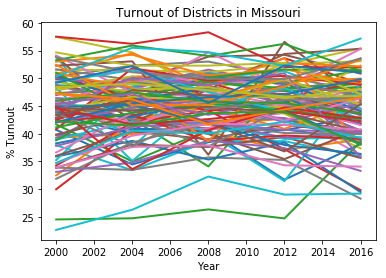

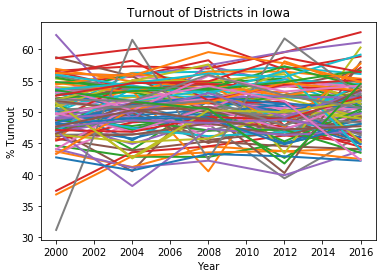

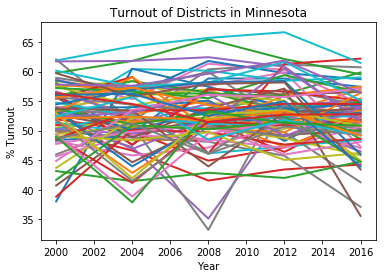

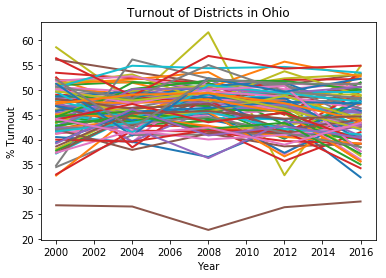

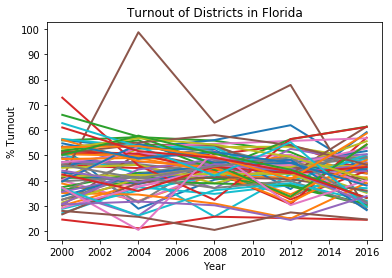

In [0]:
# plotted districts of most swinginess states
plt.figure(1)
for state in last_swing_states:
    districts = set(final_county[final_county['state'] == state]['location'].to_list())
    for district in districts:
        turnout = final_county[final_county['location'] == district]['turnout'] * 100
        if turnout.shape[0] == len(years):
            plt.plot(years, turnout, linewidth=2, markersize=12)
    
    plt.title("""Turnout of Districts in {}""".format(state))
    # plt.legend()
    plt.xlabel('Year')
    plt.ylabel('% Turnout')
    plt.show()

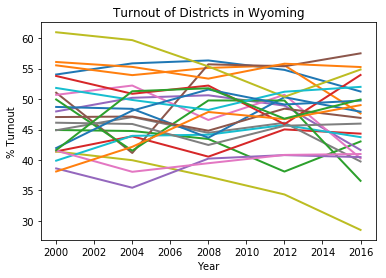

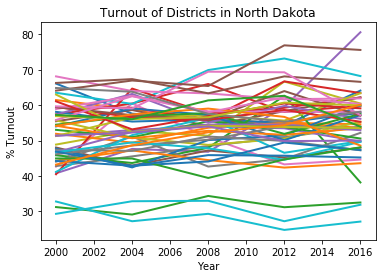

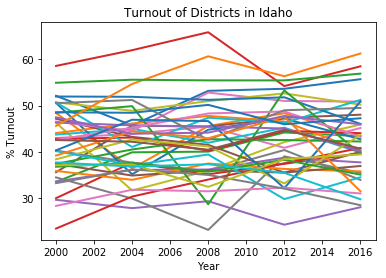

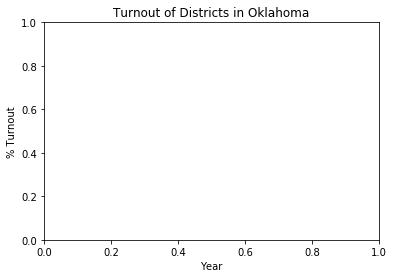

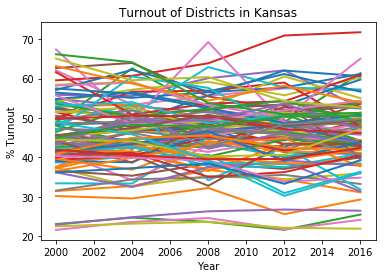

In [0]:
# plotted districts of least swinginess states
plt.figure(1)
for state in non_swing_states:
    districts = set(final_county[final_county['state'] == state]['location'].to_list())
    for district in districts:
        turnout = final_county[final_county['location'] == district]['turnout'] * 100
        if turnout.shape[0] == len(years):
            plt.plot(years, turnout, linewidth=2, markersize=12)
    
    plt.title("""Turnout of Districts in {}""".format(state))
    # plt.legend()
    plt.xlabel('Year')
    plt.ylabel('% Turnout')
    plt.show()

In [0]:
# find the avg turnout for districts in each state per year, and then graph the min and max swinginess states
avg_turnout = final_county.groupby(['year','state'])['turnout'].apply(lambda x: x.mean()).reset_index(['state','year'])

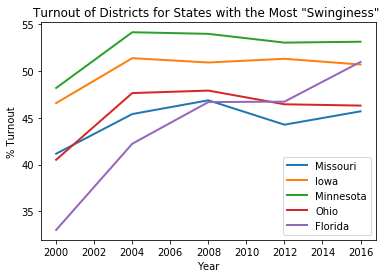

In [0]:
# most swinginess
for state in last_swing_states:
    plt.plot(years, avg_turnout[avg_turnout['state'] == state]['turnout'] * 100, linewidth=2, markersize=12)
    
plt.title("""Turnout of Districts for States with the Most "Swinginess" """)
plt.legend(last_swing_states)
plt.xlabel('Year')
plt.ylabel('% Turnout')
plt.show()

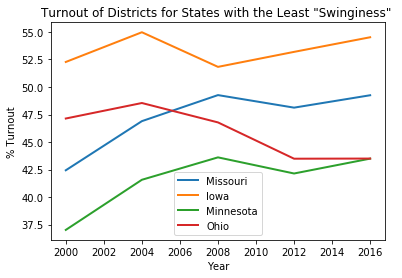

In [0]:
# least swinginess
for state in non_swing_states:
    turnout = avg_turnout[avg_turnout['state'] == state]['turnout'] * 100
    if turnout.shape[0] == len(years):
        plt.plot(years, turnout, linewidth=2, markersize=12)
    
plt.title("""Turnout of Districts for States with the Least "Swinginess" """)
plt.legend(last_swing_states)
plt.xlabel('Year')
plt.ylabel('% Turnout')
plt.show()